In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/dataset_full.csv")
df.head(3)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0


In [ ]:
x = df.drop('phishing', axis = 'columns')
y = df["phishing"]

In [ ]:
cor_matrix = x.corr().abs()
print(cor_matrix)

                      qty_dot_url  ...  url_shortened
qty_dot_url              1.000000  ...       0.059222
qty_hyphen_url           0.109737  ...       0.010346
qty_underline_url        0.127851  ...       0.012158
qty_slash_url            0.246201  ...       0.001125
qty_questionmark_url     0.409549  ...       0.012847
...                           ...  ...            ...
tls_ssl_certificate      0.065105  ...       0.037850
qty_redirects            0.051842  ...       0.049475
url_google_index         0.004035  ...       0.001785
domain_google_index      0.002490  ...       0.000045
url_shortened            0.059222  ...       1.000000

[111 rows x 111 columns]


In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)

                      qty_dot_url  ...  url_shortened
qty_dot_url                   NaN  ...       0.059222
qty_hyphen_url                NaN  ...       0.010346
qty_underline_url             NaN  ...       0.012158
qty_slash_url                 NaN  ...       0.001125
qty_questionmark_url          NaN  ...       0.012847
...                           ...  ...            ...
tls_ssl_certificate           NaN  ...       0.037850
qty_redirects                 NaN  ...       0.049475
url_google_index              NaN  ...       0.001785
domain_google_index           NaN  ...       0.000045
url_shortened                 NaN  ...            NaN

[111 rows x 111 columns]


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(); print(to_drop)


['qty_and_url', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_dot_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_percent_file', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 'tld_present_params', 'qty_params']


In [ ]:
df1 = x.drop(['qty_and_url', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_dot_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_percent_file', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 'tld_present_params', 'qty_params'], axis=1)
print(); print(df1.head())


   qty_dot_url  qty_hyphen_url  ...  domain_google_index  url_shortened
0            3               0  ...                    0              0
1            5               0  ...                    0              0
2            2               0  ...                    0              0
3            4               0  ...                    0              0
4            2               0  ...                    0              0

[5 rows x 69 columns]


In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/dataset_full.csv")
df.head(3)
x = df.drop('phishing', axis = 'columns')
y = df["phishing"]
cor_matrix = x.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(); print(to_drop)
df1 = x.drop(['qty_and_url', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_percent_file', 'qty_dot_params', 'qty_underline_params', 'qty_questionmark_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 'params_length', 'tld_present_params', 'qty_params', 'email_in_url'], axis=1)
print(); print(df1.head())
# Prepare cross-validation procedure
crossVal = KFold(n_splits = 10, random_state = 1, shuffle = True)
from sklearn.preprocessing import StandardScaler
new_x = StandardScaler().fit_transform(df1)

                      qty_dot_url  ...  url_shortened
qty_dot_url              1.000000  ...       0.059222
qty_hyphen_url           0.109737  ...       0.010346
qty_underline_url        0.127851  ...       0.012158
qty_slash_url            0.246201  ...       0.001125
qty_questionmark_url     0.409549  ...       0.012847
...                           ...  ...            ...
tls_ssl_certificate      0.065105  ...       0.037850
qty_redirects            0.051842  ...       0.049475
url_google_index         0.004035  ...       0.001785
domain_google_index      0.002490  ...       0.000045
url_shortened            0.059222  ...       1.000000

[111 rows x 111 columns]
                      qty_dot_url  ...  url_shortened
qty_dot_url                   NaN  ...       0.059222
qty_hyphen_url                NaN  ...       0.010346
qty_underline_url             NaN  ...       0.012158
qty_slash_url                 NaN  ...       0.001125
qty_questionmark_url          NaN  ...       0.012847
..

In [ ]:
# Prepare cross-validation procedure
crossVal = KFold(n_splits = 5, random_state = 1, shuffle = True)

In [2]:
# Create Model
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5,learning_rate = 0.2, n_estimators=1000)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(new_x , y, test_size = 0.2)
print(x_train.shape)

(70917, 57)


In [5]:
model.fit(x_train, y_train)

XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=1000)

In [6]:
# get a prediction
y_hat = model.predict(x_train)
y_knn = model.predict(x_test)

In [7]:
print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_knn))

Training set accuracy:  0.997828447339848
Test set accuracy:  0.9761985335589396


In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[11387   216]
 [  206  5921]]


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11603
           1       0.96      0.97      0.97      6127

    accuracy                           0.98     17730
   macro avg       0.97      0.97      0.97     17730
weighted avg       0.98      0.98      0.98     17730



<Figure size 2160x2160 with 0 Axes>

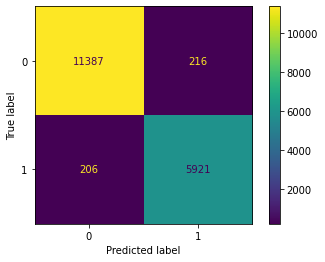

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_knn)
plt.show()

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
pred_proba1 = model.predict_proba(x_train)
pred_proba2 = model.predict_proba(x_test)

In [19]:
len(pred_proba1)

70917

In [20]:
from sklearn.metrics import RocCurveDisplay

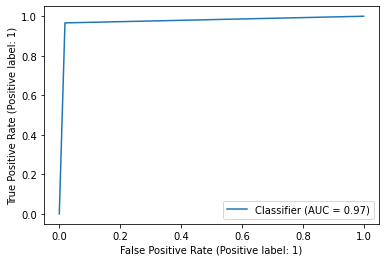

In [21]:
RocCurveDisplay.from_predictions(y_test, y_knn)

In [25]:
auc_score1 = roc_auc_score(y_test, pred_proba1[:,1])
auc_score2 = roc_auc_score(y_test, pred_proba2[:,1])

ValueError: ignored